# Introduction
- We use Google Collab to develop our model.
- Download/Upload the dataset first to working directory before going further

## Download and Extract Dataset

In [ ]:
!mkdir content

In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1BlQ0_uY3uRNxSxakjy2WyQu-fvRU8TfN -O '/content/content/content.zip'

Downloading...
From: https://drive.google.com/uc?id=1BlQ0_uY3uRNxSxakjy2WyQu-fvRU8TfN
To: /content/content/content.zip
30.6MB [00:00, 54.1MB/s]


In [ ]:
import os
import zipfile

local_zip = '/content/content/content.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/content')
zip_ref.close()

# Preparing Dataset

## Split dataset to training & testing

In [ ]:
!mkdir content/test
!mkdir content/test/acne
!mkdir content/test/dry
!mkdir content/test/normal
!mkdir content/test/oily
!mkdir content/test/scar

In [ ]:
# Acne face test data split

import random
import shutil

cur_src = '/content/content/train/acne'
tar_src = '/content/content/test/acne'
suffix = '.jpg'
num = 20

for file in range(num):
  files = os.listdir(cur_src)
  file = random.choice(files)
  base_filename = os.path.basename(file)
  new_tar = os.path.join(tar_src, base_filename)

  shutil.move(os.path.join(cur_src, file), new_tar)

In [ ]:
# Dry face test data split

import random
import shutil

cur_src = '/content/content/train/dry'
tar_src = '/content/content/test/dry'
suffix = '.jpg'
num = 20

for file in range(num):
  files = os.listdir(cur_src)
  file = random.choice(files)
  base_filename = os.path.basename(file)
  new_tar = os.path.join(tar_src, base_filename)

  shutil.move(os.path.join(cur_src, file), new_tar)

In [ ]:
# Normal face test data split

cur_src = '/content/content/train/normal'
tar_src = '/content/content/test/normal'
suffix = '.jpg'
num = 20

for file in range(num):
  files = os.listdir(cur_src)
  file = random.choice(files)
  base_filename = os.path.basename(file)
  new_tar = os.path.join(tar_src, base_filename)

  shutil.move(os.path.join(cur_src, file), new_tar)

In [ ]:
# Oily face test data split

import random
import shutil

cur_src = '/content/content/train/oily'
tar_src = '/content/content/test/oily'
suffix = '.jpg'
num = 20

for file in range(num):
  files = os.listdir(cur_src)
  file = random.choice(files)
  base_filename = os.path.basename(file)
  new_tar = os.path.join(tar_src, base_filename)

  shutil.move(os.path.join(cur_src, file), new_tar)

In [ ]:
# Scar face test data split

import random
import shutil

cur_src = '/content/content/train/scar'
tar_src = '/content/content/test/scar'
suffix = '.jpg'
num = 20

for file in range(num):
  files = os.listdir(cur_src)
  file = random.choice(files)
  base_filename = os.path.basename(file)
  new_tar = os.path.join(tar_src, base_filename)

  shutil.move(os.path.join(cur_src, file), new_tar)

Make sure your directory level looks like this :


---


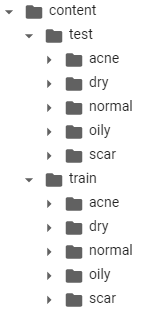

### Define Training & Testing dataset

In [ ]:
base_dir = '/content/content'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training pictures
acne_train_dir = os.path.join(train_dir, 'acne')
dry_train_dir = os.path.join(train_dir, 'dry')
normal_train_dir = os.path.join(train_dir, 'normal')
oily_train_dir = os.path.join(train_dir, 'oily')
scar_train_dir = os.path.join(train_dir, 'scar')

# Directory with our validation pictures
acne_test_dir = os.path.join(test_dir, 'acne')
dry_test_dir = os.path.join(test_dir, 'dry')
normal_test_dir = os.path.join(test_dir, 'normal')
oily_test_dir = os.path.join(test_dir, 'oily')
scar_test_dir = os.path.join(test_dir, 'scar')


In [ ]:
train_acne_fnames = os.listdir( acne_train_dir )
train_dry_fnames = os.listdir( dry_train_dir )
train_normal_fnames = os.listdir( normal_train_dir )
train_oily_fnames = os.listdir( oily_train_dir )
train_scar_fnames = os.listdir( scar_train_dir )

print(train_acne_fnames[:10])
print(train_dry_fnames[:10])
print(train_normal_fnames[:10])
print(train_oily_fnames[:10])
print(train_scar_fnames[:10])

['girl-problematic-skin-scars-acne-260nw-459808471.jpg', 'big-acne-260nw-344564.jpg', 'download (3).jpg', 'beautiful-young-girl-problematic-skin-260nw-1628469727.jpg', 'girl-acne-before-after-treatment-260nw-544114579.jpg', '596113.jpg', '138675_1_En_28_Fig3_HTML.jpg', 'portrait-woman-showing-her-pimples-260nw-124532071.jpg', 'ini-bedanya-jerawat-batu-dan-jerawat-biasa-1556092307.jpg', 'blogger1-final.jpg']
['images (4).jpg', 'download (6).jpg', 'xerosis2.jpg', 'download (3).jpg', 'images (24).jpg', 'images (5).jpg', 'images (9).jpg', '08152020 Dry Skin.jpg', 'images (28).jpg', 'dry_skin-300x144.png']
['v2_0729145.jpg', 'girl-acne-before-after-treatment-260nw-544114579.jpg', '0514738.jpg', '0059782.jpg', '0057689.jpg', '0057674.jpg', '0479170.jpg', 'face-beautiful-woman-before-after-260nw-1806390520.jpg', 'v2_0607190.jpg', '0059387.jpg']
['v3_0878132.jpg', 'v3_0075963.jpg', 'v3_0353882.jpg', 'v3_0189047.jpg', 'maxresdefault (1).jpg', 'v3_0585710.jpg', 'v3_0329689.jpg', 'w1200_10d5_Oily

In [ ]:
print('Number of training acne face image   :', len(os.listdir( acne_train_dir ) ))
print('Number of training dry face image    :', len(os.listdir( dry_train_dir ) ))
print('Number of training normal face image :', len(os.listdir( normal_train_dir ) ))
print('Number of training oily face image   :', len(os.listdir( oily_train_dir ) ))
print('Number of training scar face image   :', len(os.listdir( scar_train_dir ) ))

print('\nNumber of test acne face image   :', len(os.listdir( acne_test_dir ) ))
print('Number of test dry face image    :', len(os.listdir( dry_test_dir ) ))
print('Number of test normal face image :', len(os.listdir( normal_test_dir ) ))
print('Number of test oily face image   :', len(os.listdir( oily_test_dir ) ))
print('Number of test scar face image   :', len(os.listdir( scar_test_dir ) ))

Number of training acne face image   : 80
Number of training dry face image    : 80
Number of training normal face image : 80
Number of training oily face image   : 80
Number of training scar face image   : 80

Number of test acne face image   : 20
Number of test dry face image    : 20
Number of test normal face image : 20
Number of test oily face image   : 20
Number of test scar face image   : 20


We will have a look on our dataset 

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x5 configuration
nrows = 5
ncols = 4

pic_index = 0 # Index for iterating over images

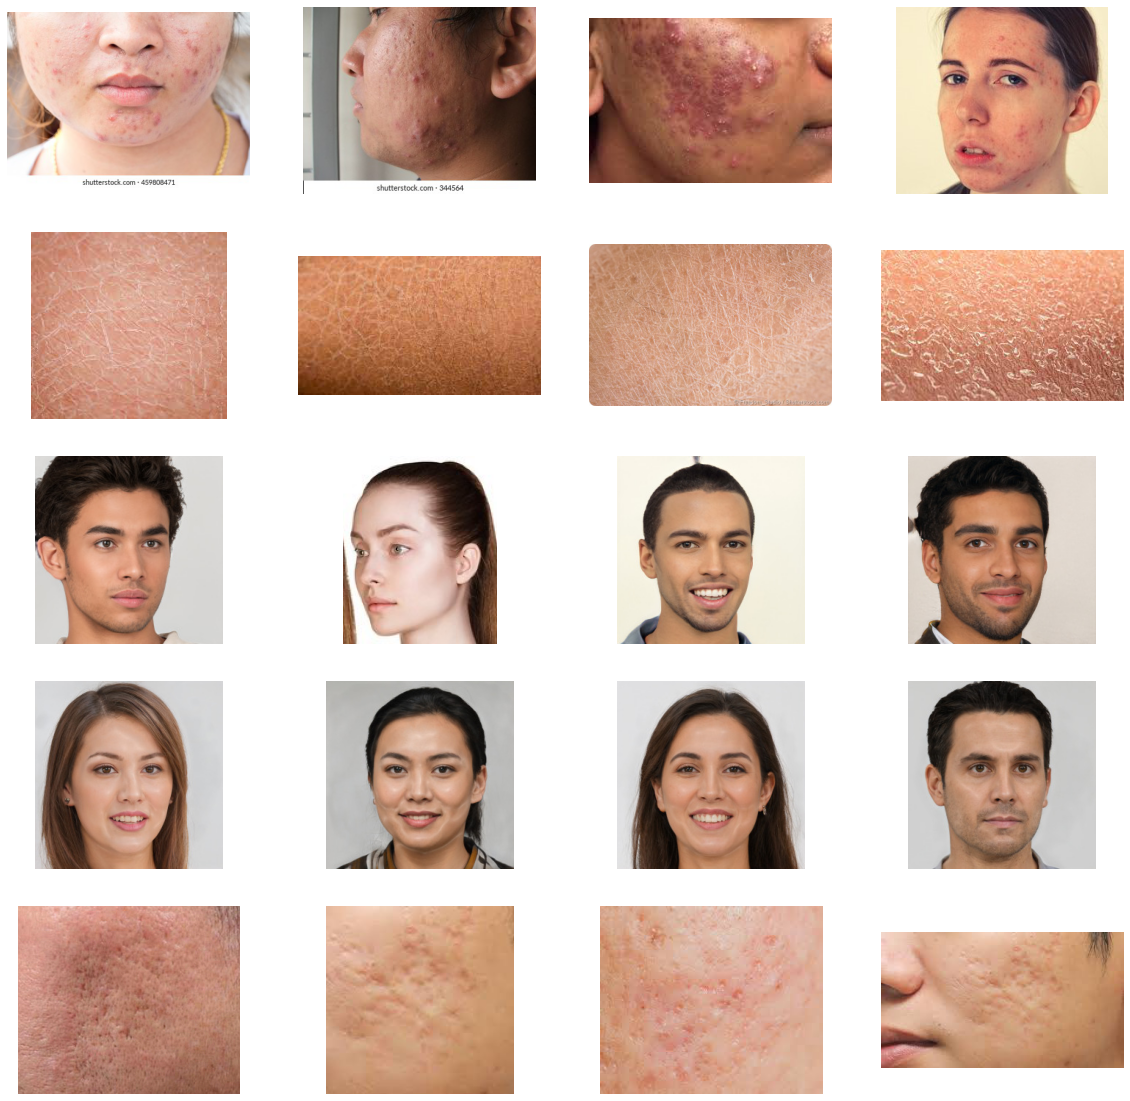

In [ ]:
# Set up matplotlib fig, and size it to fit 4x5 pics
fig = plt.gcf()
fig.set_size_inches(ncols*5, nrows*4)

pic_index+=4

next_acne_pix = [os.path.join(acne_train_dir, fname) 
                for fname in train_acne_fnames[pic_index-4:pic_index] 
               ]

next_dry_pix = [os.path.join(dry_train_dir, fname) 
                for fname in train_dry_fnames[pic_index-4:pic_index] 
               ]

next_normal_pix = [os.path.join(normal_train_dir, fname) 
                for fname in train_normal_fnames[pic_index-4:pic_index] 
               ]

next_oily_pix = [os.path.join(oily_train_dir, fname) 
                for fname in train_oily_fnames[pic_index-4:pic_index] 
               ]

next_scar_pix = [os.path.join(scar_train_dir, fname) 
                for fname in train_scar_fnames[pic_index-4:pic_index] 
               ]

for i, img_path in enumerate(next_acne_pix+next_dry_pix+next_normal_pix+next_oily_pix+next_scar_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data Preprocessing

Input image shape will be **(224,224,1)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1/255,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    brightness_range=[0.2,1.0],
                    data_format="channels_last",
                    dtype=tf.float32
                )

val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(224,224),
                    batch_size=20,
                    class_mode='categorical'
                )

validation_generator = val_datagen.flow_from_directory(
                    test_dir,
                    target_size=(224,224),
                    batch_size=20,
                    class_mode='categorical'
                )

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


# Build Model

We will use [MobileNet_V2 by Tensofrlow](https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4) as part of our model



In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import tensorflow_hub as hub # To Have MobileNet

In [ ]:
MODULE_HANDLE = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'
FV_SIZE = 1280
IMG_SIZE = (224, 224)
feature_extractor = hub.KerasLayer(MODULE_HANDLE, input_shape = IMG_SIZE + (3,), output_shape=[FV_SIZE], trainable=True)

In [ ]:
model = models.Sequential([
    feature_extractor,
    layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
_________________________________________________________________
dense (Dense)                (None, 5)                 5010      
Total params: 3,545,275
Trainable params: 3,511,163
Non-trainable params: 34,112
_________________________________________________________________


# **Training Data**

*Note : Disarankan menggunakan GPU*

---
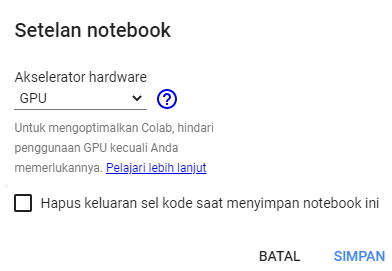


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=20,
                    epochs=30,
                    verbose=2,
                    validation_data=validation_generator,
                    # validation_steps=5
)

Epoch 1/30
20/20 - 44s - loss: 1.3188 - accuracy: 0.6225 - val_loss: 3.9396 - val_accuracy: 0.5100
Epoch 2/30
20/20 - 7s - loss: 0.8273 - accuracy: 0.7825 - val_loss: 5.7829 - val_accuracy: 0.4800
Epoch 3/30
20/20 - 8s - loss: 0.6359 - accuracy: 0.8475 - val_loss: 5.2954 - val_accuracy: 0.4700
Epoch 4/30
20/20 - 8s - loss: 0.4979 - accuracy: 0.8850 - val_loss: 2.2660 - val_accuracy: 0.6600
Epoch 5/30
20/20 - 8s - loss: 0.5779 - accuracy: 0.8425 - val_loss: 1.1694 - val_accuracy: 0.8100
Epoch 6/30
20/20 - 8s - loss: 0.4089 - accuracy: 0.8975 - val_loss: 1.5558 - val_accuracy: 0.7200
Epoch 7/30
20/20 - 8s - loss: 0.4102 - accuracy: 0.9075 - val_loss: 0.8611 - val_accuracy: 0.8500
Epoch 8/30
20/20 - 8s - loss: 0.3447 - accuracy: 0.9150 - val_loss: 0.7797 - val_accuracy: 0.8700
Epoch 9/30
20/20 - 8s - loss: 0.3238 - accuracy: 0.9400 - val_loss: 0.5307 - val_accuracy: 0.9200
Epoch 10/30
20/20 - 8s - loss: 0.3135 - accuracy: 0.9225 - val_loss: 0.9664 - val_accuracy: 0.8300
Epoch 11/30
20/20 

# **Evaluasi Accuracy & Loss**

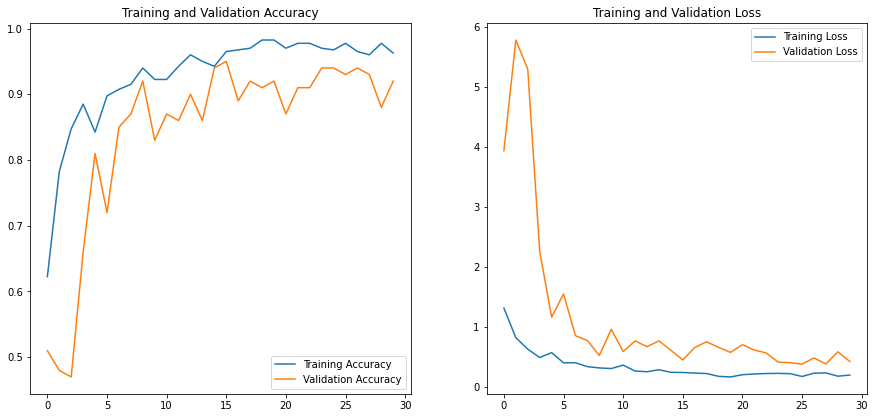

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Testing**

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  img = image.load_img(fn, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=20)
  results = np.where(classes[0] == np.amax(classes))
  
  if results[0][0] == 0:
    prediction = 'Acne skin'
  elif results[0][0] == 1:
    prediction = 'Dry skin'
  elif results[0][0] ==2:
    prediction = 'Normal skin'
  elif results[0][0] == 3:
    prediction = 'Oily skin'
  elif results[0][0] == 4:
    prediction = 'Scar skin'
print('{} is a {} with {:.2%} probability!'.format(fn, prediction, classes[0][results][0]))

Saving 2.jpg to 2.jpg
2.jpg is a Dry skin with 99.77% probability!


# Saved Model

We provide some method to saved model, but we will used the first method to saved our model. You can choose any method that you want as per your requirement

**SavedModel #1**

In [ ]:
model.save("saved_model/1") # We use this method

**SavedModel #2**

In [ ]:
from tensorflow.keras.models import Sequential, save_model

filepath = './saved_model/1'

tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

INFO:tensorflow:Assets written to: ./saved_model/1/assets


INFO:tensorflow:Assets written to: ./saved_model/1/assets


Since it really cumbersome to download the file one by one, we will create a zip file from our saved model before we download it

In [ ]:
!zip -r "/content/saved_model.zip" "./saved_model"

  adding: saved_model/ (stored 0%)
  adding: saved_model/1/ (stored 0%)
  adding: saved_model/1/variables/ (stored 0%)
  adding: saved_model/1/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: saved_model/1/variables/variables.index (deflated 81%)
  adding: saved_model/1/assets/ (stored 0%)
  adding: saved_model/1/keras_metadata.pb (deflated 80%)
  adding: saved_model/1/saved_model.pb (deflated 92%)


**Alternative**

In [ ]:
tf.saved_model.save(model, './saved_model/')

**SavedModel #3**

In [ ]:
KERAS_MODEL_NAME = "skindec-model.h5"

In [ ]:
model.save(KERAS_MODEL_NAME)

**SavedModel #4**

In [ ]:
import tensorflow as tf

model_version = "1"
model_name = "skindec-model"
model_path = os.path.join(model_name, model_version)
tf.saved_model.save(model, model_path)

In [ ]:
model.save("skindec-model.h5")

**Saved model in TensorFlow Lite (.tflite) format**

In [ ]:
TF_LITE_MODEL_FILE_NAME = "skindec-model.tflite"

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)